In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
from sklearn import datasets
irisdata = datasets.load_iris()
iris = pd.DataFrame(irisdata.data, columns = irisdata.feature_names)
iris['target'] = irisdata.target
iris['target_name'] = iris['target'].replace([0,1,2], [species for species in irisdata['target_names'].tolist()])
iris = iris.iloc[0:100,:]
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


In [3]:
### Check Data
print('Counts of NaN value: \n', iris.isna().sum(axis=0), '\n')
print('Column data type: \n', iris.dtypes)

Counts of NaN value: 
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64 

Column data type: 
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
target_name           object
dtype: object


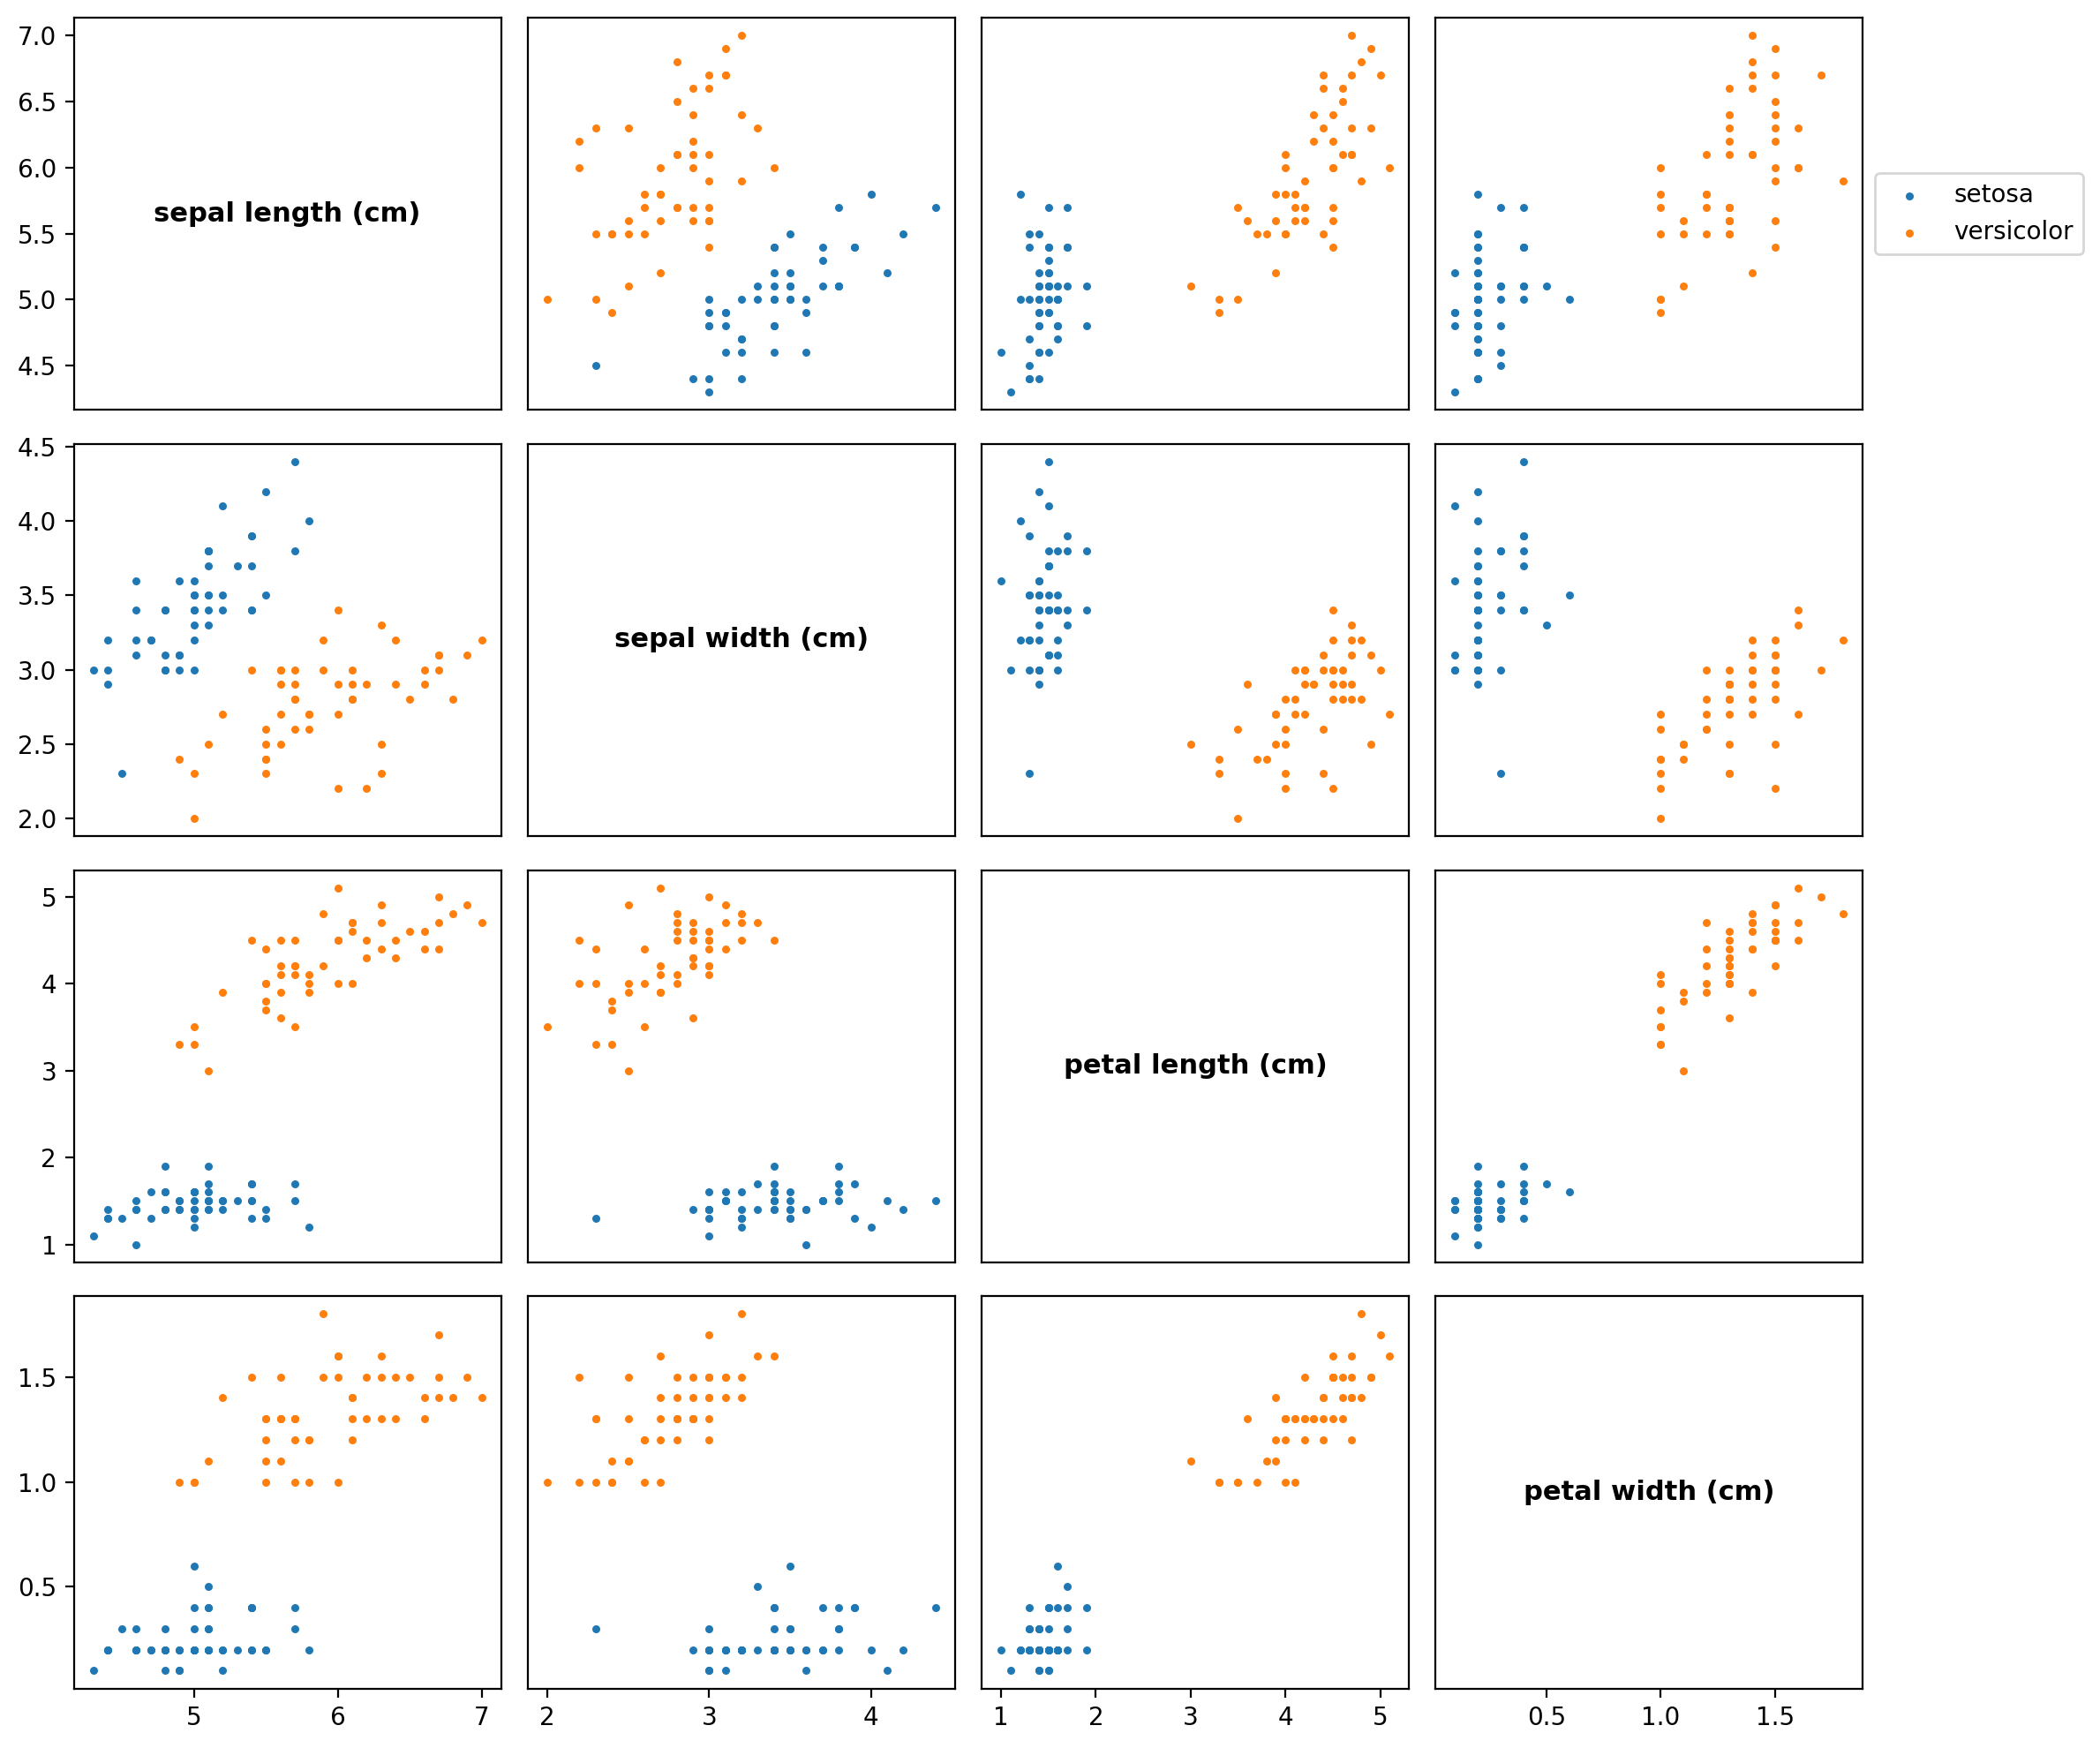

In [4]:
### Visualization(2) - Scatter Plot
plt.figure(figsize = (12,10), dpi=200)
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        if i!=j:
            plt.scatter(iris.iloc[(iris.iloc[:,4] == 0).values,j],iris.iloc[(iris.iloc[:,4] == 0).values,i], s=5)
            plt.scatter(iris.iloc[(iris.iloc[:,4] == 1).values,j],iris.iloc[(iris.iloc[:,4] == 1).values,i], s=5)
            if i==0:
                if j==3:
                    plt.legend(['setosa', 'versicolor'], loc='center left',bbox_to_anchor=(1, 0.5))
        if i==j:
            x_loc = np.mean([np.min(iris.iloc[:,j]), np.max(iris.iloc[:,j])])
            y_loc = np.mean([np.min(iris.iloc[:,i]), np.max(iris.iloc[:,i])])
            plt.scatter(iris.iloc[:,j],iris.iloc[:,i], s=0)
            plt.text(y_loc, x_loc, iris.columns[i], horizontalalignment='center', verticalalignment='center',fontsize=11, fontweight='bold')
        if j!=0:
            plt.yticks([])
        if i!=3:
            plt.xticks([])
plt.tight_layout()
plt.show()

In [5]:
# Set seed, pick train test randomly
np.random.seed(524773)
test_num = np.concatenate([np.sort(np.random.choice(np.arange(50), int(15), replace=False)), 
                           np.sort(np.random.choice(np.arange(50,100), int(15), replace=False))])
train_num = np.delete(np.arange(len(iris)), test_num)
iris_train = iris.iloc[train_num,:]
iris_test = iris.iloc[test_num,:]
select_feature = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)", "target_name"]
#iris_test

In [6]:
# Naïve Bayes using sklearn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(iris_train[select_feature].drop(columns = ['target_name']), iris_train['target_name'])
pred_prob = model.predict_proba(iris_test[select_feature].drop(columns = ['target_name']))
pred_label = model.predict(iris_test[select_feature].drop(columns = ['target_name']))
accuracy = np.sum((iris_test['target_name'] == pred_label))/len(iris_test)

In [7]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(iris_test['target_name'], pred_label, labels=["setosa", "versicolor"])
print("Accuracy: ", round(accuracy,3))
print("Confusion matrix: \n", conf_mat)

Accuracy:  1.0
Confusion matrix: 
 [[15  0]
 [ 0 15]]


In [8]:
iris_test[select_feature].groupby("target_name").count().iloc[:,0]. rename('counts')

target_name
setosa        15
versicolor    15
Name: counts, dtype: int64